In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and select short data

In [2]:
df_short = pd.read_csv('results/logs_results_128_short.csv')
models = np.array((df_short.iloc[:,0]))

In [3]:
mask_vgg16_cifar10 = ['vgg' in x and 'cifar10' in x and 'cifar100' not in x for x in models]
mask_resnet18_cifar10 = ['res' in x and 'cifar10' in x and 'cifar100' not in x for x in models]
mask_vgg16_cifar100 = ['vgg' in x and 'cifar100' in x for x in models]
mask_resnet18_cifar100 = ['res' in x and 'cifar100' in x for x in models]

In [4]:
vgg16_cifar10 = df_short[df_short.iloc[:,0].isin(models[mask_vgg16_cifar10])]
resnet18_cifar10 = df_short[df_short.iloc[:,0].isin(models[mask_resnet18_cifar10])]
vgg16_cifar100 = df_short[df_short.iloc[:,0].isin(models[mask_vgg16_cifar100])]
resnet18_cifar100 = df_short[df_short.iloc[:,0].isin(models[mask_resnet18_cifar100])]

### Select best learning rate

In [5]:
def select_lr(df):
    df['sum'] = df.apply(lambda r: r.iloc[1:].sum(), axis=1)
    df['lr'] = df.apply(lambda r: r.iloc[0][-8:][:4], axis=1)
    return df.groupby(['lr'])['sum'].sum().idxmax()

In [6]:
%%capture warning
lr_vgg16_cifar10 = select_lr(vgg16_cifar10)
lr_res18_cifar10 = select_lr(resnet18_cifar10)
lr_vgg16_cifar100 = select_lr(vgg16_cifar100)
lr_res18_cifar100 = select_lr(resnet18_cifar100)

In [7]:
vgg16_cifar10 = vgg16_cifar10[vgg16_cifar10['lr'] == lr_vgg16_cifar10]
resnet18_cifar10 = resnet18_cifar10[resnet18_cifar10['lr'] == lr_res18_cifar10]
vgg16_cifar100 = vgg16_cifar100[vgg16_cifar100['lr'] == lr_vgg16_cifar100]
resnet18_cifar100 = resnet18_cifar100[resnet18_cifar100['lr'] == lr_res18_cifar100]

### Plot reproduced results

In [32]:
def plot_and_save(df, y, x = [1, 2, 4, 8, 16, 32, 64, 128], dir_dest='plots'):
    name = df.iloc[0, 0][:-9]
    model = name.split('_')[0]
    data = name.split('_')[1]
    lr = float(df.iloc[0, -1][-2:]) / 100

    l02 = list(df.iloc[0][2:-2])
    l04 = list(df.iloc[1][2:-2])
    l08 = list(df.iloc[2][2:-2])
    l16 = list(df.iloc[3][2:-2])

    if len(l02) == 8:
        name += '_short'
        marker = '*'
    else:
        name += '_long'
        x = np.arange(128) + 1
        marker = ''

    fig, axs = plt.subplots(1)

    # Title and legends
    axs.set_title('{mod} {data} \n learning rate {lr}'.format(mod=model, data=data, lr=lr), fontsize = 12)
    axs.set_xlabel('Simulation time-steps')
    axs.set_ylabel('Accuracy')

    # Data
    print(np.arange(len(x)))
    print(l02)
    axs.plot(np.arange(len(x)), l02, marker=marker, label='L=2')
    axs.plot(np.arange(len(x)), l04, marker=marker, label='L=4')
    axs.plot(np.arange(len(x)), l08, marker=marker, label='L=8')
    axs.plot(np.arange(len(x)), l16, marker=marker, label='L=16')

    # Axis options
    if len(l02) == 8:
        axs.xaxis.set_ticks(np.arange(len(x)))
        axs.xaxis.set_ticklabels(x)
    else:
        x = x[::12]
        axs.xaxis.set_ticks(x)
        axs.xaxis.set_ticklabels(x)
    axs.yaxis.set_ticks(y)

    # Style options
    plt.grid()
    plt.legend(loc=4)
    axs.set_facecolor('whitesmoke')

    plt.savefig(os.path.join(dir_dest, '{name}_v2.png'.format(name=name)))
    plt.show();

In [22]:
vgg16_cifar10

,Unnamed: 0,ann,t=1,t=2,t=4,t=8,t=16,t=32,t=64,t=128,sum,lr
48,vgg16_cifar10_LR01_L02,0.8455,0.7611,0.8009,0.8241,0.8394,0.8445,0.8470,0.8466,0.8457,7.4548,LR01
49,vgg16_cifar10_LR01_L04,0.8814,0.6750,0.7779,0.8355,0.8672,0.8818,0.8844,0.8841,0.8832,7.5705,LR01
50,vgg16_cifar10_LR01_L08,0.9170,0.1008,0.6319,0.7826,0.8507,0.8909,0.9098,0.9154,0.9168,6.9159,LR01
51,vgg16_cifar10_LR01_L16,0.9396,0.1000,0.1542,0.8861,0.9149,0.9327,0.9376,0.9396,0.9390,6.7437,LR01


[0 1 2 3 4 5 6 7]
[0.7611, 0.8009, 0.8241, 0.8394, 0.8445, 0.847, 0.8466, 0.8457]


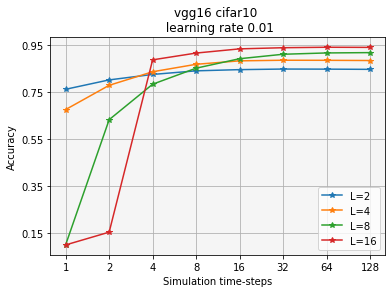

In [23]:
plot_and_save(vgg16_cifar10, y = [0.15, 0.35, 0.55, 0.75, 0.95])

[0 1 2 3 4 5 6 7]
[0.911, 0.9192, 0.9302, 0.9359, 0.9378, 0.9381, 0.9374, 0.9379]


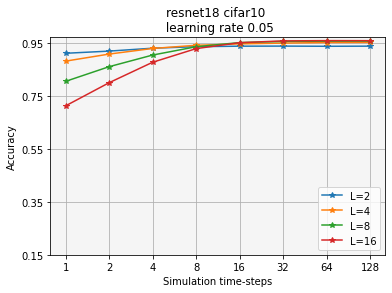

In [24]:
plot_and_save(resnet18_cifar10, y = [0.15, 0.35, 0.55, 0.75, 0.95])

[0 1 2 3 4 5 6 7]
[0.5438, 0.5829, 0.6131, 0.6367, 0.651, 0.6627, 0.6657, 0.6669]


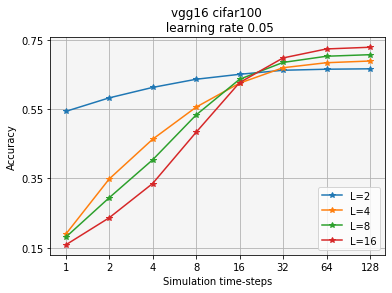

In [25]:
plot_and_save(vgg16_cifar100, y = [0.15, 0.35, 0.55, 0.75])

[0 1 2 3 4 5 6 7]
[0.6216, 0.6725, 0.7133, 0.7395, 0.7523, 0.7564, 0.757, 0.7554]


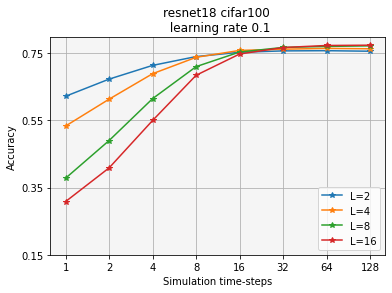

In [26]:
plot_and_save(resnet18_cifar100, y = [0.15, 0.35, 0.55, 0.75])

### Load and select long data

In [28]:
df_short = pd.read_csv('results/logs_results_128_long.csv')
models = np.array((df_short.iloc[:,0]))
mask_vgg16_cifar10 = ['vgg' in x and 'cifar10' in x and 'cifar100' not in x for x in models]
mask_resnet18_cifar10 = ['res' in x and 'cifar10' in x and 'cifar100' not in x for x in models]
mask_vgg16_cifar100 = ['vgg' in x and 'cifar100' in x for x in models]
mask_resnet18_cifar100 = ['res' in x and 'cifar100' in x for x in models]
vgg16_cifar10 = df_short[df_short.iloc[:,0].isin(models[mask_vgg16_cifar10])]
resnet18_cifar10 = df_short[df_short.iloc[:,0].isin(models[mask_resnet18_cifar10])]
vgg16_cifar100 = df_short[df_short.iloc[:,0].isin(models[mask_vgg16_cifar100])]
resnet18_cifar100 = df_short[df_short.iloc[:,0].isin(models[mask_resnet18_cifar100])]

In [29]:
%%capture warning
lr_vgg16_cifar10 = select_lr(vgg16_cifar10)
lr_res18_cifar10 = select_lr(resnet18_cifar10)
lr_vgg16_cifar100 = select_lr(vgg16_cifar100)
lr_res18_cifar100 = select_lr(resnet18_cifar100)
vgg16_cifar10 = vgg16_cifar10[vgg16_cifar10['lr'] == lr_vgg16_cifar10]
resnet18_cifar10 = resnet18_cifar10[resnet18_cifar10['lr'] == lr_res18_cifar10]
vgg16_cifar100 = vgg16_cifar100[vgg16_cifar100['lr'] == lr_vgg16_cifar100]
resnet18_cifar100 = resnet18_cifar100[resnet18_cifar100['lr'] == lr_res18_cifar100]

In [30]:
vgg16_cifar10.iloc[0, -1]

'LR01'

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
[0.7611, 0.8009, 0.8153, 0.8241, 0.8307, 0.8333, 0.8372, 0.8394, 0.84, 0.8405, 0.8417, 0.8421, 0.8435, 0.8437, 0.8442, 0.8445, 0.8449, 0.845, 0.8453, 0.8455, 0.846, 0.8467, 0.8464, 0.8464, 0.8464, 0.8462, 0.8463, 0.8471, 0.8466, 0.8467, 0.8472, 0.847, 0.847, 0.8469, 0.8478, 0.8473, 0.8474, 0.8475, 0.8474, 0.847, 0.8467, 0.8469, 0.8467, 0.8467, 0.8467, 0.8469, 0.8468, 0.8471, 0.8474, 0.8468, 0.8469, 0.8469, 0.8471, 0.8468, 0.847, 0.8472, 0.8471, 0.8473, 0.847, 0.8472, 0.8465,

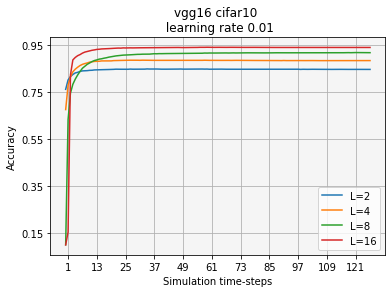

In [33]:
plot_and_save(vgg16_cifar10, y = [0.15, 0.35, 0.55, 0.75, 0.95])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
[0.911, 0.9192, 0.9256, 0.9302, 0.9315, 0.9333, 0.935, 0.9359, 0.9363, 0.9366, 0.9364, 0.9366, 0.9365, 0.937, 0.9373, 0.9378, 0.938, 0.9385, 0.939, 0.9387, 0.9386, 0.9383, 0.9385, 0.9386, 0.9384, 0.9385, 0.9383, 0.938, 0.9382, 0.9378, 0.9377, 0.9381, 0.938, 0.9381, 0.9382, 0.9382, 0.938, 0.9378, 0.9378, 0.9379, 0.9379, 0.9379, 0.9378, 0.938, 0.9377, 0.9378, 0.9378, 0.9379, 0.9376, 0.9377, 0.9374, 0.9373, 0.9373, 0.9374, 0.9375, 0.9374, 0.9374, 0.9374, 0.9373, 0.9373, 0.9372,

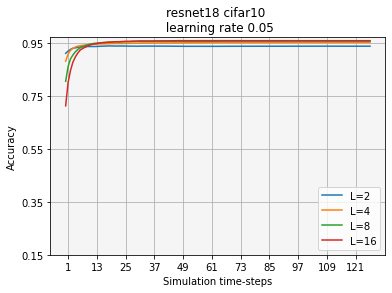

In [34]:
plot_and_save(resnet18_cifar10, y = [0.15, 0.35, 0.55, 0.75, 0.95])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
[0.5438, 0.5829, 0.6017, 0.6131, 0.6204, 0.6264, 0.6326, 0.6367, 0.6399, 0.6432, 0.646, 0.6467, 0.6485, 0.6486, 0.65, 0.651, 0.6535, 0.6556, 0.656, 0.656, 0.6575, 0.6575, 0.6577, 0.6582, 0.6589, 0.6592, 0.6602, 0.6607, 0.6608, 0.6609, 0.662, 0.6627, 0.663, 0.6631, 0.6637, 0.6639, 0.6632, 0.6636, 0.6636, 0.6641, 0.6643, 0.6643, 0.6646, 0.6646, 0.6645, 0.6651, 0.6654, 0.6656, 0.6649, 0.6649, 0.6646, 0.6649, 0.6649, 0.6649, 0.6648, 0.6651, 0.6654, 0.6657, 0.6655, 0.6652, 0.6652

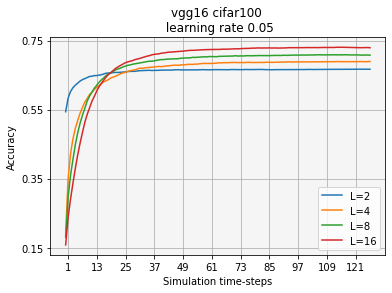

In [35]:
plot_and_save(vgg16_cifar100, y = [0.15, 0.35, 0.55, 0.75])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
[0.6216, 0.6725, 0.6944, 0.7133, 0.7235, 0.7314, 0.7354, 0.7395, 0.7422, 0.7441, 0.7462, 0.7474, 0.7487, 0.7498, 0.751, 0.7523, 0.7519, 0.7537, 0.7536, 0.7546, 0.7553, 0.7548, 0.7552, 0.7556, 0.7553, 0.7556, 0.7558, 0.7558, 0.7564, 0.7561, 0.7561, 0.7564, 0.7562, 0.7566, 0.7563, 0.7566, 0.7563, 0.7566, 0.7571, 0.7564, 0.7569, 0.7569, 0.7569, 0.7569, 0.7568, 0.757, 0.7571, 0.7572, 0.7568, 0.7567, 0.7566, 0.7567, 0.7569, 0.7567, 0.7566, 0.7567, 0.7564, 0.7571, 0.7566, 0.7567, 

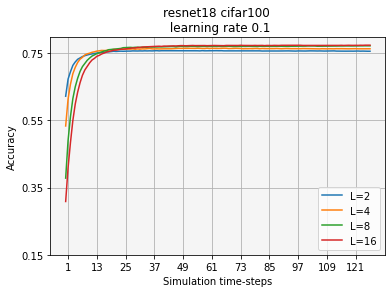

In [36]:
plot_and_save(resnet18_cifar100, y = [0.15, 0.35, 0.55, 0.75])